In [ ]:
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train[1000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  97,  84,
         97, 110, 108,  87,  97,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 255, 199,
        183, 142, 161, 200, 213,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  72, 174, 173,
        158, 131, 132, 176, 176,  70,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 142, 180, 163,
        120, 180, 126, 139, 168, 122,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 156, 180, 162,
        171, 170, 183, 163, 169, 144,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 159, 177, 163,
        174, 166, 173, 170, 163, 148,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

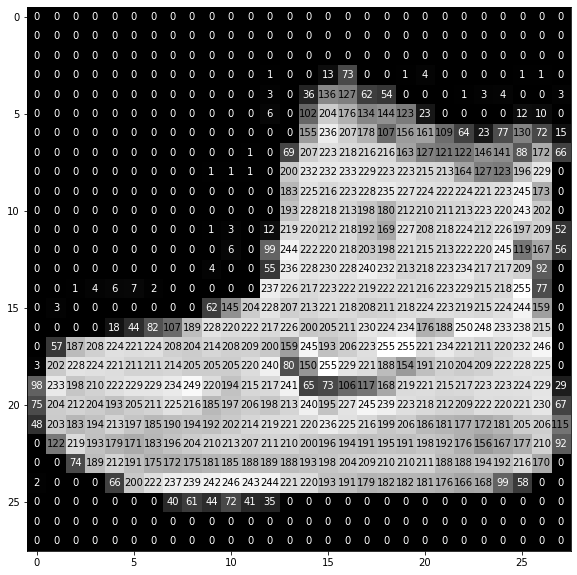

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(x_train[0], ax)
plt.show()

In [ ]:
print(y_train)
print(y_test)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


In [ ]:
label = "T-shirt/top Trouser Pullover Dress	Coat Sandal	Shirt	Sneaker	Bag	Ankle-boot"
label = label.split()
label

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle-boot']

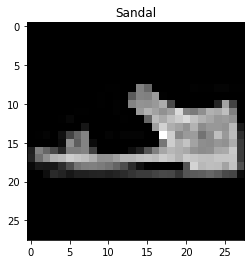

In [ ]:
import matplotlib.pyplot as plt
import random
i= random.randint(0,60000)
plt.imshow(x_train[i], cmap='gray')
plt.title((label[y_train[i]]))
plt.show()


In [ ]:
import numpy as np
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
np.unique(y_test, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [ ]:
 x_train= x_train/255
 x_test = x_test/255

In [ ]:
print(x_train.max())
print(x_train.min())



1.0
0.0


In [ ]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.Sequential()
model.add(Flatten(input_shape=(28,28))) # 784
model.add(Dense(392,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6221 - accuracy: 0.7782 - val_loss: 0.4368 - val_accuracy: 0.8493
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3762 - accuracy: 0.8631 - val_loss: 0.3527 - val_accuracy: 0.8718
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3306 - accuracy: 0.8791 - val_loss: 0.3544 - val_accuracy: 0.8679
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3006 - accuracy: 0.8892 - val_loss: 0.3491 - val_accuracy: 0.8738
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2853 - accuracy: 0.8945 - val_loss: 0.3281 - val_accuracy: 0.8844
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2702 - accuracy: 0.9004 - val_loss: 0.3272 - val_accuracy: 0.8846
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2553 - accuracy: 0.9036 - val_loss: 0.3180 - val_accuracy:

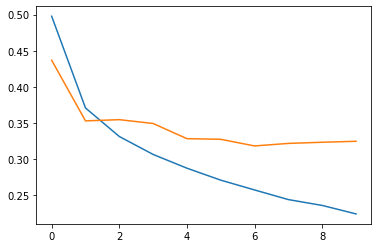

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

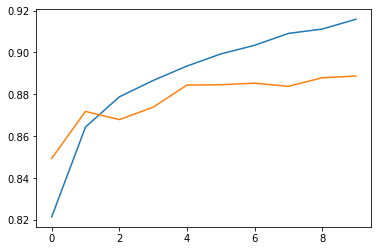

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
y_pred=model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_pred,y_test)

array([[746,   1,   9,  12,   1,   0,  86,   0,   4,   0],
       [  2, 972,   0,   4,   1,   0,   1,   0,   0,   0],
       [ 25,   1, 810,  12, 120,   0, 104,   0,   6,   0],
       [ 48,  22,  17, 943,  63,   1,  43,   0,   6,   0],
       [  4,   1,  99,  10, 762,   0,  65,   0,   3,   0],
       [  0,   0,   0,   0,   0, 957,   0,  14,   1,   4],
       [165,   2,  64,  17,  53,   0, 688,   0,   2,   1],
       [  0,   0,   0,   0,   0,  22,   0, 973,   3,  49],
       [ 10,   1,   1,   2,   0,   2,  13,   1, 975,   0],
       [  0,   0,   0,   0,   0,  18,   0,  12,   0, 946]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       859
           1       0.97      0.99      0.98       980
           2       0.81      0.75      0.78      1078
           3       0.94      0.83      0.88      1143
           4       0.76      0.81      0.78       944
           5       0.96      0.98      0.97       976
           6       0.69      0.69      0.69       992
           7       0.97      0.93      0.95      1047
           8       0.97      0.97      0.97      1005
           9       0.95      0.97      0.96       976

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
print(accuracy_score(y_pred,y_test))

0.8772


In [ ]:
# saving my model : .h5 , .hdf5

In [ ]:
model.save('fashion_mnist.hdf5')

In [ ]:
 # model parameters and architexture are saved
 # Weights and bias